# Similarités entre séries

#### - recherche d'une mesure de similarité pertinente

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import wordpunct_tokenize
import seaborn as sns
#using https://github.com/amueller/word_cloud
from wordcloud import WordCloud

from utils.load_data import getMostImportantSeries

plt.style.use('seaborn-white')
%matplotlib inline

#dataset path
path = "/root/Documents/PLDAC/data"
w2vPath = "/root/Documents/PLDAC/Word2VecData/"
nbSeries = 20

In [3]:
seriesNames, epCount = getMostImportantSeries(path, byepisodes=True)
series = seriesNames[:nbSeries]
series

['411_Doctor_Who_(1963)',
 '1095_The_Simpsons',
 '1535_Law_Order_SVU',
 '2976_Law_Order',
 '1039_CSI__Crime_Scene_Investigation',
 '830_ER',
 '342_Fair_City',
 '2331_NCIS',
 '2580_Two_and_a_Half_Men',
 '2927_South_Park',
 '1379_Frasier',
 '2296_Married..._With_Children',
 '2046_Bewitched',
 '625_Family_Guy',
 '490_MASH',
 '976_Grey_s_Anatomy',
 '2013_Survivor',
 '2142_Criminal_Minds',
 '2441_Friends',
 '1253_CSI__Miami']

Reprenons notre liste de séries célèbres, étoffée cette fois-ci: la liste contient **42 séries de plusieurs genres différents**.

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
nltk_stopw = stopwords.words('english')

def tokenize(text):
    #   no punctuation & starts with a letter & between 3-15 characters in length
    tokens = [word.strip(string.punctuation) for word in RegexpTokenizer(r'\b[a-zA-Z][a-zA-Z0-9]{2,14}\b').tokenize(text)]
    return [f.lower() for f in tokens if f and f.lower() not in nltk_stopw]

In [5]:
corpus = []
corpus_tokenized = []
for serie in series:
    listepisodes = glob.glob(path+"/"+serie+"/*/*.lines")
    text = ""
    serie_tokens = []
    for episode in listepisodes:
        with open(episode, "r", encoding="utf-8") as file:
            tokenized = tokenize(file.read())
            serie_tokens += tokenized
            text += " " + " ".join(tokenized)
    corpus_tokenized.append(serie_tokens)
    corpus.append(text)

In [6]:
print(corpus_tokenized[0][:10])
print(corpus[0][:99])

['doctor', 'theme', 'humming', 'groans', 'right', 'doctor', 'groaning', 'doctor', 'invasion', 'begun']
 doctor theme humming groans right doctor groaning doctor invasion begun yes jamie rather gathered 


In [7]:
with open(w2vPath+"corpus","w") as f:
    for doc in corpus:
        f.write(doc)
        f.write(" ")

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import word2vec
p_size = 100

In [10]:
word2vec.word2phrase(w2vPath+"corpus", w2vPath+'corpus-phrases', verbose=True)

Starting training using file /root/Documents/PLDAC/Word2VecData/corpus
Words processed: 11300K     Vocab size: 4762K  
Vocab size (unigrams + bigrams): 2564681
Words in train file: 11317596


In [11]:
word2vec.word2vec(w2vPath+'corpus-phrases', w2vPath+'corpus.bin', size=p_size, verbose=True)

Starting training using file /root/Documents/PLDAC/Word2VecData/corpus-phrases
Vocab size: 66251
Words in train file: 10716159
Alpha: 0.000002  Progress: 100.04%  Words/thread/sec: 142.65k    Words/thread/sec: 126.03k  d/sec: 134.54k  Words/thread/sec: 141.81k  hread/sec: 142.21k  97k  023614  Progress: 5.57%  Words/thread/sec: 141.53k  s: 6.21%  Words/thread/sec: 142.58k  ad/sec: 143.06k    43.36k  ress: 7.90%  Words/thread/sec: 142.67k  84  Progress: 8.48%  Words/thread/sec: 143.26k  00%  Words/thread/sec: 143.00k  sec: 143.86k  read/sec: 143.81k  06k  rds/thread/sec: 144.46k  ress: 10.96%  Words/thread/sec: 144.66k    Words/thread/sec: 143.67k  : 143.32k  43.52k  ad/sec: 143.45k  ords/thread/sec: 142.76k  12.97%  Words/thread/sec: 143.35k  rogress: 13.29%  Words/thread/sec: 142.44k  ha: 0.021582  Progress: 13.69%  Words/thread/sec: 142.54k  a: 0.021476  Progress: 14.12%  Words/thread/sec: 142.25k  1366  Progress: 14.56%  Words/thread/sec: 141.83k  0.021335  Progress: 14.68%  Words/t

In [12]:
word2vec.word2clusters(w2vPath+"corpus", w2vPath+'corpus-clusters.txt', p_size, verbose=True)

Starting training using file /root/Documents/PLDAC/Word2VecData/corpus
Vocab size: 48330
Words in train file: 11196135
Alpha: 0.000002  Progress: 100.04%  Words/thread/sec: 134.65k    Progress: 1.30%  Words/thread/sec: 125.09k  /thread/sec: 127.15k  .25%  Words/thread/sec: 134.17k  /thread/sec: 134.32k   Words/thread/sec: 135.81k  .82%  Words/thread/sec: 136.24k  ords/thread/sec: 137.55k  read/sec: 138.87k   Words/thread/sec: 140.11k  81  Progress: 5.29%  Words/thread/sec: 140.90k  s: 5.62%  Words/thread/sec: 140.42k   Progress: 5.98%  Words/thread/sec: 140.11k  %  Words/thread/sec: 140.03k  /sec: 140.74k  41.24k  thread/sec: 141.51k  : 142.05k  Words/thread/sec: 142.38k  Words/thread/sec: 142.73k  c: 142.30k    Words/thread/sec: 142.32k  s: 10.91%  Words/thread/sec: 142.98k  43.21k   143.36k   143.93k  12.63%  Words/thread/sec: 143.76k  2.88%  Words/thread/sec: 143.59k  Progress: 13.34%  Words/thread/sec: 143.38k  : 143.48k  ad/sec: 143.31k  367  Progress: 14.55%  Words/thread/sec: 14

In [13]:
model = word2vec.load(w2vPath+'corpus.bin')

In [14]:
model.vocab

array(['</s>', 'know', 'get', ..., 'athertons', 'kipayo', 'gunmelt'],
      dtype='<U78')

In [15]:
model.vectors.shape

(66251, 100)

In [16]:
model.vectors

array([[ 0.14333282,  0.15825513, -0.13715845, ...,  0.05456942,
         0.10955409,  0.00693387],
       [ 0.08522963, -0.06683531, -0.20209791, ...,  0.05883418,
        -0.14443673,  0.07408841],
       [-0.21027602, -0.07544246,  0.01562951, ...,  0.06484609,
        -0.11549708,  0.17264278],
       ...,
       [-0.00207344, -0.04671646,  0.07349046, ...,  0.09639452,
         0.0385769 ,  0.06516949],
       [ 0.16346149, -0.06585746,  0.12217364, ..., -0.02754136,
         0.10673585, -0.0815584 ],
       [-0.06036337, -0.05010266, -0.01720569, ...,  0.17009611,
         0.04315769, -0.1329854 ]])

In [17]:
model['bart'].shape

(100,)

In [18]:
model['bart'][:10]

array([ 0.20503013, -0.06727954, -0.02783315,  0.06513367, -0.07823345,
        0.09169652,  0.03737107,  0.04752671, -0.14669022,  0.05418976])

In [19]:
model.distance("bart", "lisa", "fatwah")

[('bart', 'lisa', 0.8416748274554965),
 ('bart', 'fatwah', 0.17148313499325024),
 ('lisa', 'fatwah', 0.19534121498525486)]

In [20]:
indexes, metrics = model.similar("dog")
indexes, metrics

(array([ 1136,  1578,  4632, 45429,  9646,  2834,  8402,  8843,  4509,
         1620]),
 array([0.74284407, 0.68465393, 0.63985068, 0.61558598, 0.59108688,
        0.58225222, 0.57058501, 0.55648513, 0.55603793, 0.53746733]))

In [21]:
model.generate_response(indexes, metrics).tolist()

[('cat', 0.7428440730225525),
 ('dogs', 0.6846539260538494),
 ('puppy', 0.6398506811172056),
 ('ate_homework', 0.6155859840717877),
 ('mutt', 0.5910868783971095),
 ('pet', 0.5822522155042023),
 ('bark', 0.5705850073134271),
 ('leash', 0.5564851340168908),
 ('kitty', 0.5560379268213922),
 ('bird', 0.5374673328919165)]

In [22]:
indexes, metrics = model.similar('los_angeles')
model.generate_response(indexes, metrics).tolist()

[('washington', 0.8286934600093994),
 ('montreal', 0.8061348972200946),
 ('san_diego', 0.7968388341241036),
 ('detroit', 0.792984230790895),
 ('phoenix', 0.7871555108779267),
 ('san_francisco', 0.7847292579506842),
 ('philadelphia', 0.7809235606414052),
 ('colorado', 0.7790177461286574),
 ('maryland', 0.7743629175535343),
 ('atlanta', 0.7738046617185522)]

In [23]:
indexes, metrics = model.analogy(pos=['homer', 'woman'], neg=['man'])
indexes, metrics

(array([ 524, 2272,  481, 7594, 1399, 4158,  434, 2128, 2718, 4926]),
 array([0.28878441, 0.25567313, 0.24159724, 0.23203615, 0.23200247,
        0.22837575, 0.22477854, 0.22011571, 0.21546289, 0.2153767 ]))

In [24]:
model.generate_response(indexes, metrics).tolist()

[('marge', 0.2887844148269407),
 ('homie', 0.25567312962578614),
 ('lisa', 0.2415972440099887),
 ('selma', 0.23203615291468607),
 ('maggie', 0.23200247176442917),
 ('apu', 0.2283757482373704),
 ('bart', 0.2247785355868055),
 ('milhouse', 0.2201157124674348),
 ('flanders', 0.21546288807688427),
 ('seymour', 0.21537669671065995)]

In [25]:
clusters = word2vec.load_clusters(w2vPath+'corpus-clusters.txt')

In [26]:
clusters.vocab

array(['</s>', 'know', 'get', ..., 'athertons', 'kipayo', 'gunmelt'],
      dtype='<U15')

In [28]:
print(clusters.vocab[10])
print(clusters.get_words_on_cluster(10)[:10])

want
['control' 'power' 'cannot' 'attack' 'others' 'dangerous' 'destroy'
 'possibly' 'impossible' 'build']


In [29]:
model.clusters = clusters

In [32]:
indexes, metrics = model.analogy(pos=["bart", "woman"], neg=["man"])

In [33]:
model.generate_response(indexes, metrics).tolist()

[('lisa', 0.2814573208873719, 39),
 ('maggie', 0.24860368380202474, 12),
 ('milhouse', 0.24359804351500863, 19),
 ('marge', 0.2407982844131878, 39),
 ('seymour', 0.23439729275821566, 58),
 ('homer', 0.2339768534752399, 3),
 ('mrs_krabappel', 0.22326221333501317, 64),
 ('homie', 0.21971076882080787, 28),
 ('principal_skinner', 0.21896822375010572, 77),
 ('gasps', 0.20712228860610446, 13)]

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = corpus_tokenized
X=np.array([np.array(xi) for xi in X])          #   rows: Docs. columns: words
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=1).fit(X)
word_index = vectorizer.vocabulary_
Xencoded = vectorizer.transform(X)

In [35]:
def getEmbeddingMatrix (word_index, embeddings):
    embedding_matrix = np.zeros((len(word_index)+1, p_size))  # +1 for the masked 0 in keras/lstm. Does not affect tf-idf/svm
    for word, i in word_index.items():
        if word in embeddings:
            embedding_matrix[i] = embeddings[word]
    return embedding_matrix

In [36]:
def sparseMultiply (sparseX, embedding_matrix):
    denseZ = []
    for row in sparseX:
        newRow = np.zeros(p_size)
        for nonzeroLocation, value in list(zip(row.indices, row.data)):
            newRow = newRow + value * embedding_matrix[nonzeroLocation]
        denseZ.append(newRow)
    denseZ = np.array([np.array(xi) for xi in denseZ])
    return denseZ

In [37]:
embedding_matrix = getEmbeddingMatrix (word_index, model)
Xencoded = sparseMultiply( Xencoded, embedding_matrix)

In [38]:
Xencoded.shape

(20, 100)

In [39]:
model.vectors.shape

(66251, 100)

In [40]:
vec = Xencoded

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(Xencoded)

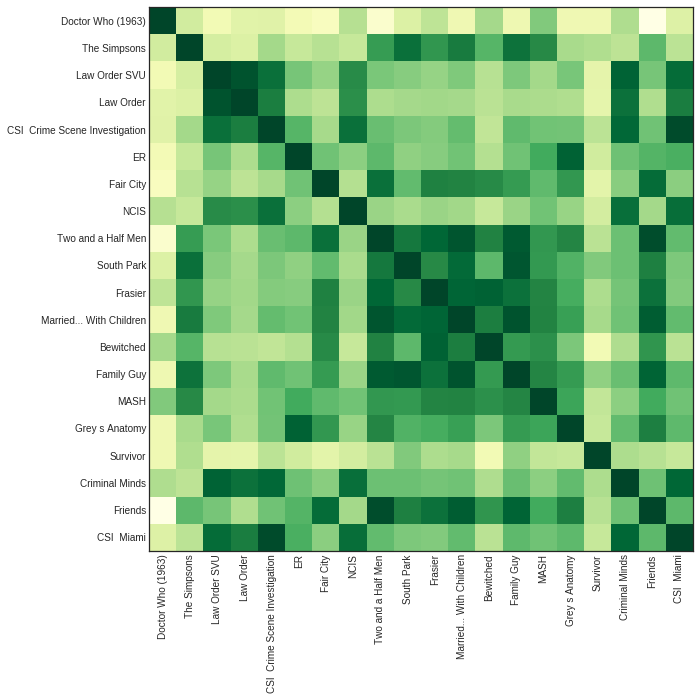

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(sim, cmap='YlGn', interpolation='nearest')
plt.xticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series], rotation='vertical')
plt.yticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series])
plt.show()